In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df=pd.read_csv('/content/drive/MyDrive/Propvalue Estimation System/gurgaon_properties_missing_value_imputation_dv.csv').drop_duplicates()

In [19]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
856,flat,ansal heights 86,sector 86,0.87,5367.0,2.0,2.0,1,12.0,New Property,1231.0,0.0,0.0,0.0,0.0,1.0,1.0,45.0
1819,flat,uphaar homes,sector 105,0.45,4737.0,3.0,2.0,1,1.0,Relatively New,1056.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0
2290,flat,emaar gurgaon greens,sector 102,1.35,10800.0,3.0,4.0,3+,9.0,Relatively New,1400.0,0.0,1.0,0.0,1.0,0.0,1.0,174.0


In [37]:
df.shape

(3550, 18)

In [33]:
df.shape[1]

18

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [22]:

df.shape

(3550, 18)

In [23]:

latlong = pd.read_csv('/content/drive/MyDrive/Propvalue Estimation System/latlong.csv')

#written code of extracting latlongs in pycharm--web scrapping
#some added manually

In [24]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [25]:
latlong.isnull().sum()

,0
sector,0
coordinates,0


In [26]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [27]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [28]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [29]:
latlong.isnull().sum()

,0
sector,0
coordinates,0
latitude,0
longitude,0


In [30]:
latlong.duplicated().sum()

np.int64(0)

In [31]:
new_df = df.merge(latlong, on='sector')

In [36]:
new_df.shape

(3325, 21)

In [32]:
new_df.shape[1]

21

In [ ]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
new_df.head(1)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.416,76.9914


In [38]:
new_df.to_csv('final_df.csv')

In [39]:
print(new_df[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']].dtypes)

price             float64
price_per_sqft    float64
built_up_area     float64
latitude          float64
longitude         float64
dtype: object


In [50]:
new_df['sector'].value_counts()

,count
sector,
sector 85,108
sector 102,106
sector 92,100
sector 69,92
sector 90,88
...,...
sector 40,5
sector 80,5
sector 73,3


In [52]:
new_df['sector'].shape

(3325,)

In [48]:
new_df['sector'].unique()

array(['sector 36', 'sector 89', 'sector 92', 'sector 102', 'gwal pahari',
       'sector 108', 'sector 105', 'sector 26', 'sector 109', 'sector 28',
       'sector 65', 'sector 12', 'sector 85', 'sector 30', 'sector 107',
       'sector 3', 'sector 2', 'sector 41', 'sector 4', 'sector 62',
       'sector 49', 'sector 81', 'sector 66', 'sector 86', 'sector 48',
       'sector 51', 'sector 37', 'sector 111', 'sector 67', 'sector 113',
       'sector 13', 'sector 61', 'sector 69', 'sector 67a', 'sector 37d',
       'sector 82', 'sector 53', 'sector 74', 'sector 52', 'sector 43',
       'sector 14', 'sector 25', 'sector 95', 'sector 56', 'sector 83',
       'sector 104', 'sector 88a', 'sector 55', 'sector 50', 'sector 84',
       'sector 91', 'sector 76', 'sector 82a', 'sector 78', 'manesar',
       'sector 93', 'sector 7', 'sector 71', 'sector 110', 'sector 33',
       'sector 70', 'sector 103', 'sector 90', 'sector 38', 'sector 79',
       'sector 112', 'sector 22', 'sector 59', 'sector

In [49]:
new_df['sector'].nunique()

101

In [53]:
temp_df = new_df.drop(['society', 'property_type', 'agePossession'], axis=1)

In [55]:
temp_df

,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,sector 36,0.82,7586.0,3.0,2.0,2,2.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.4160,76.9914
1,sector 89,0.95,8597.0,2.0,2.0,2,4.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,"28.4253° N, 76.9439° E",28.4253,76.9439
2,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,"28.4079° N, 76.9153° E",28.4079,76.9153
3,sector 102,0.48,9023.0,2.0,2.0,1,5.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,"28.4750° N, 76.9715° E",28.4750,76.9715
4,gwal pahari,7.50,14019.0,4.0,4.0,3+,20.0,4842.0,0.0,1.0,0.0,1.0,1.0,1.0,49.0,"28.4484° N, 77.0210° E",28.4484,77.0210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,sector 84,0.37,6346.0,2.0,2.0,1,5.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,"28.3979° N, 76.9736° E",28.3979,76.9736
3321,sector 109,6.00,9634.0,5.0,5.0,3+,2.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,160.0,"28.5073° N, 77.0089° E",28.5073,77.0089
3322,sector 2,0.60,8163.0,1.0,1.0,1,5.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,"28.5095° N, 77.0320° E",28.5095,77.0320
3323,sector 43,15.50,28233.0,5.0,6.0,3,3.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,76.0,"28.4629° N, 77.0772° E",28.4629,77.0772


In [57]:
temp_df.to_csv('check_df.csv')

In [59]:
print(temp_df.dtypes)

sector              object
price              float64
price_per_sqft     float64
bedRoom            float64
bathroom           float64
balcony             object
floorNum           float64
built_up_area      float64
study room         float64
servant room       float64
store room         float64
pooja room         float64
others             float64
furnishing_type    float64
luxury_score       float64
coordinates         object
latitude           float64
longitude          float64
dtype: object


In [60]:
temp_df= temp_df.drop(['balcony', 'coordinates'], axis=1)

In [61]:
group_df = temp_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]
#taking avg of price, price per sqft

In [62]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.703679,10605.905660,1562.179245,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [63]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [66]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.4160,76.9914
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,"28.4253° N, 76.9439° E",28.4253,76.9439
2,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,"28.4079° N, 76.9153° E",28.4079,76.9153
3,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,"28.4750° N, 76.9715° E",28.4750,76.9715
4,flat,paras quartier,gwal pahari,7.50,14019.0,4.0,4.0,3+,20.0,New Property,4842.0,0.0,1.0,0.0,1.0,1.0,1.0,49.0,"28.4484° N, 77.0210° E",28.4484,77.0210


In [67]:
new_df.to_csv('data_viz1.csv',index=False)

In [68]:
new_df.to_csv('/content/drive/MyDrive/Propvalue Estimation System/data_viz1.csv',index=False)

In [69]:
df1 = pd.read_csv('/content/drive/MyDrive/Propvalue Estimation System/gurgaon_properties_ap.csv')

In [70]:
df1.head()


,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,"144, Sector 36 Sohna, Gurgaon, Haryana",2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",We need to shift somewhere else,NaN,"['Lift(s)', 'Park']",NaN
1,2 BHK Flat in Sector 89 Gurgaon,flat,smart world gems,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room","O 118d, Sector 89 Gurgaon, Gurgaon, Haryana",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",Smartworld gem4 th floor new construction,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 86 Gurgaon,flat,pyramid elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",Near to dwarka expressway\nNear to airport,[],"['Intercom Facility', 'Lift(s)', 'Park']","['Environment5 out of 5', 'Safety4.5 out of 5'..."
3,2 BHK Flat in Sohna,flat,breez global hill view,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,"1701 & 1708, Sohna, Gurgaon, Haryana",17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",Both adjacent properties available which can b...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."
4,3 BHK Flat in Sector 92 Gurgaon,flat,bestech park view sanskruti,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others","Sector 92 Gurgaon, Gurgaon, Haryana",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...",Check out this 3 bhk apartment for sale in bes...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction5 out of..."


In [71]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]


In [72]:
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [73]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [74]:
main


['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [75]:
from wordcloud import WordCloud

In [76]:
feature_text = ' '.join(main)

In [77]:
import pickle
pickle.dump(feature_text, open('/content/drive/MyDrive/Propvalue Estimation System/feature_text.pkl','wb'))

In [78]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

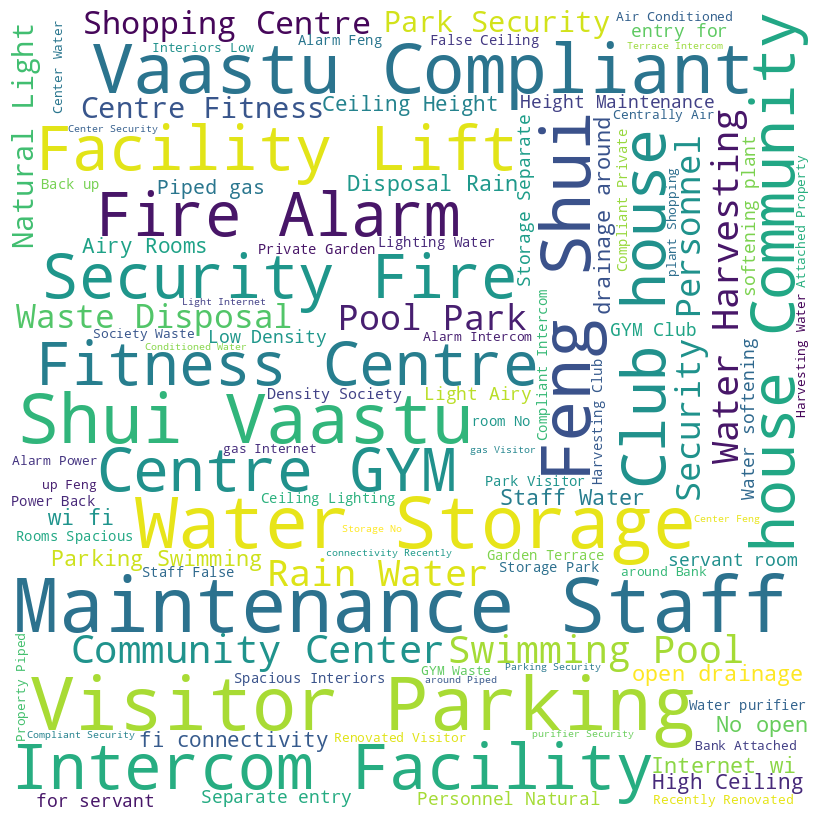

In [87]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()

In [80]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [81]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [82]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [83]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

<ipython-input-84-dc32b660127e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-84-dc32b660127e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

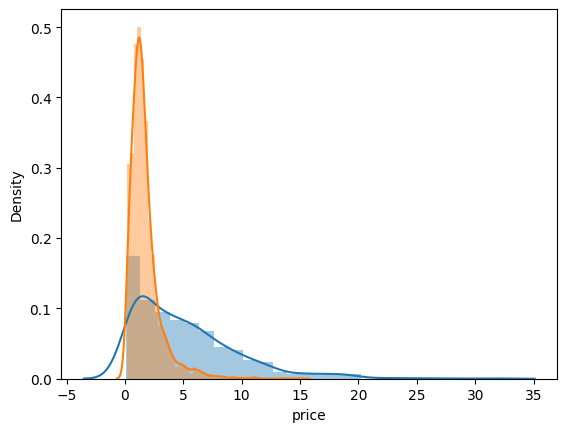

In [84]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [85]:
new_df['sector'].unique().tolist().insert(0,'overall')